Simulation run when code training done.

In [2]:
import pygame
import neat
import random
import math
# Define some constants for the simulation
SCREEN_WIDTH = 800
SCREEN_HEIGHT = 600
SHIP_SIZE = 20
FPS = 60
RANDOM_ELIMINATION_PROBABILITY = 0.01

path = '?'

clock = pygame.time.Clock()

WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (225, 25, 25)
BLUE = (75, 225, 250)
RANDOM_COLOR = (random.randint(0,255), random.randint(0,255), random.randint(0,255))

# Initialize Pygame and set up the screen
pygame.init()
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))

# Define the font
pygame.font.init()
FONT = pygame.font.SysFont('Comic Sans MS', 20)
pygame.display.set_caption("NEAT Ship Simulation")

# Define the Ship class
class Ship:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.vel_x = 0
        self.vel_y = 0

    def update(self):
        self.x += self.vel_x
        self.y += self.vel_y

    def draw(self):
        pygame.draw.rect(screen, RANDOM_COLOR, (self.x, self.y, SHIP_SIZE, SHIP_SIZE))

# Define the fitness function for the NEAT algorithm
def calculate_fitness(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 0

        # Create a new Ship object for this genome
        ship = Ship(SCREEN_WIDTH // 2, SCREEN_HEIGHT // 2)

        # Create a feedforward neural network from the genome and the configuration file
        net = neat.nn.FeedForwardNetwork.create(genome, config)

        # Run the simulation for a fixed number of frames
        prev_pos = (ship.x, ship.y)  # Keep track of previous position to check if the ship is stuck
        frames_stuck = 0  # Keep track of how many frames the ship has been stuck in one place
        frames_stuck_1 = 0
        for i in range(FPS * 10):
            # Get the output of the neural network
            output = net.activate([ship.x, ship.y, ship.vel_x, ship.vel_y])

            # Set the ship's velocity based on the output of the neural network
            ship.vel_x = output[0] * 10 - 5
            ship.vel_y = output[1] * 10 - 5

            # Update the ship's position
            ship.update()

            # Check if the ship has gone off the screen
            if ship.x < 0 or ship.x > SCREEN_WIDTH or ship.y < 0 or ship.y > SCREEN_HEIGHT:
                genome.fitness = 0
                break

            NEW_RANDOM_ELIMINATION_PROBABILITY = RANDOM_ELIMINATION_PROBABILITY

            # Check if the ship has been stuck in one place for too long
            curr_pos = (ship.x, ship.y)
            if abs(curr_pos[0] - prev_pos[0]) < 5 and abs(curr_pos[1] - prev_pos[1]) < 5:
                frames_stuck += 1
                if frames_stuck >= FPS * 10:  # If the ship has been stuck for more than 10 seconds
                    genome.fitness = 0  # Set the fitness to 0
                    # print(f'Ship has not moved for too long.')
                    break
            else:
                frames_stuck = 0  # Reset the frames_stuck counter if the ship has moved

            if abs(curr_pos[0] - prev_pos[0]) < 50 and abs(curr_pos[1] - prev_pos[1]) < 50:
                frames_stuck_1 += 1
                if frames_stuck_1 >= FPS * 10:  # If the ship has been stuck for more than 10 seconds
                    NEW_RANDOM_ELIMINATION_PROBABILITY = 2 * NEW_RANDOM_ELIMINATION_PROBABILITY
                    # print(f'Random elimination probability increased.')
                    # print(f'New probability : {NEW_RANDOM_ELIMINATION_PROBABILITY}')
                    break
            else:
                frames_stuck_1 = 0  # Reset the frames_stuck counter if the ship has moved

            if random.random() < NEW_RANDOM_ELIMINATION_PROBABILITY:
                text = FONT.render('Randomly ship sank.', True, BLACK)
                screen.blit(text, (int(SCREEN_WIDTH/2 - text.get_width()/2), int(SCREEN_HEIGHT/2 - text.get_height()/2)))
                genome.fitness = 0  # Set the fitness to 0

            # Increase the genome's fitness for each frame the ship is on the screen
            genome.fitness += 1

            prev_pos = curr_pos


# Set up the NEAT algorithm
config_file = path
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, config_file)
population = neat.Population(config)

# Add the fitness function to the NEAT algorithm
population.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
population.add_reporter(stats)

# Run the NEAT algorithm for a fixed number of generations
winner = population.run(calculate_fitness, 10)

# Draw the winning Ship on the screen
ship = Ship(SCREEN_WIDTH // 2, SCREEN_HEIGHT // 2)
net = neat.nn.FeedForwardNetwork.create(winner, config)
boolean_value = True
while boolean_value:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            boolean_value = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_ESCAPE or event.key == pygame.K_q:
                boolean_value = False


    output = net.activate([ship.x, ship.y, ship.vel_x, ship.vel_y])
    ship.vel_x = output[0] * 10 - 5
    ship.vel_y = output[1] * 10 - 5
    ship.update()

    screen.fill(BLUE)
    ship.draw()
    pygame.display.update()

    # Wait for a short time
    clock.tick(30)

# Quit the simulation
pygame.quit() 


 ****** Running generation 0 ****** 

Population's average fitness: 0.00000 stdev: 0.00000
Best fitness: 0.00000 - size: (27, 150) - species 1 - id 1
Average adjusted fitness: 0.000
Mean genetic distance 3.874, standard deviation 0.115
Population of 10000 members in 1000 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    10      0.0    0.000     0
     2    0    10      0.0    0.000     0
     3    0    10      0.0    0.000     0
     4    0    10      0.0    0.000     0
     5    0    10      0.0    0.000     0
     6    0    10      0.0    0.000     0
     7    0    10      0.0    0.000     0
     8    0    10      0.0    0.000     0
     9    0    10      0.0    0.000     0
    10    0    10      0.0    0.000     0
    11    0    10      0.0    0.000     0
    12    0    10      0.0    0.000     0
    13    0    10      0.0    0.000     0
    14    0    10      0.0    0.000     0
    15    0    10      0.0    0.000     0
    

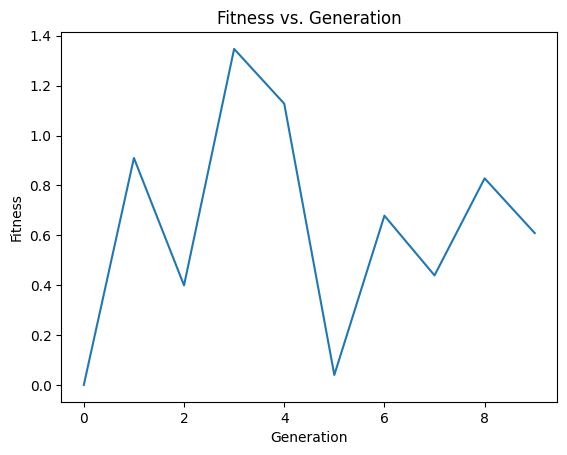

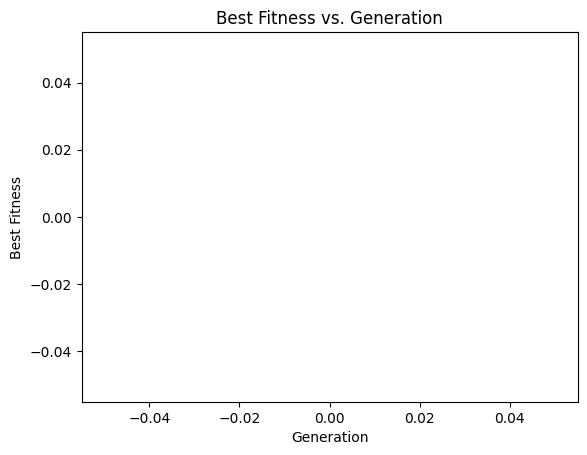

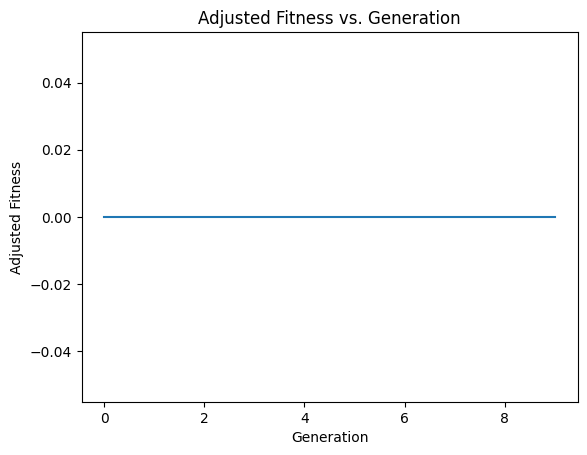

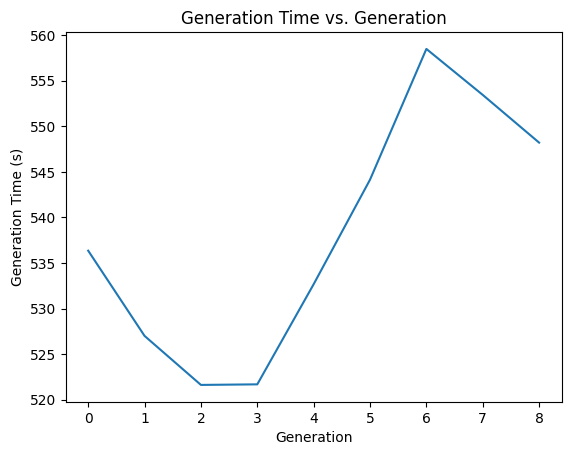

Total extinctions: 0


In [8]:
import re
import matplotlib.pyplot as plt

# Define regular expressions to extract information from log file
total_extinctions_regex = r'Total extinctions: (\d+)'
generation_time_regex = r'Generation time: ([\d\.]+) sec \(([\d\.]+) average\)'
fitness_regex = r'Population\'s average fitness: ([\d\.]+) stdev: ([\d\.]+)'
best_fitness_regex = r'Best fitness: ([\d\.]+)- size: \((\d+), (\d+)\) - species (\d+) - id (\d+)'
adjusted_fitness_regex = r'Average adjusted fitness: ([\d\.]+)'

# Open log file and read contents
with open('evolution-log.txt', 'r') as f:
    log_contents = f.read()

# Extract relevant information using regular expressions
total_extinctions = int(re.findall(total_extinctions_regex, log_contents)[0])
generation_times = [float(x[0]) for x in re.findall(generation_time_regex, log_contents)]
fitness_values = [float(x[-1]) for x in re.findall(fitness_regex, log_contents)]
best_fitness_values = [float(x[0]) for x in re.findall(best_fitness_regex, log_contents)]
adjusted_fitness_values = [float(x) for x in re.findall(adjusted_fitness_regex, log_contents)]

# Plot fitness vs. generation
plt.plot(fitness_values)
plt.title('Fitness vs. Generation')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.savefig('FitnessVSGeneration.png')
plt.show()

# Plot best fitness vs. generation
plt.plot(best_fitness_values)
plt.title('Best Fitness vs. Generation')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.savefig('Best_FitnessVSGeneration.png')
plt.show()

# Plot adjusted fitness vs. generation
plt.plot(adjusted_fitness_values)
plt.title('Adjusted Fitness vs. Generation')
plt.xlabel('Generation')
plt.ylabel('Adjusted Fitness')
plt.savefig('Adjusted_FitnessVSGeneration.png')
plt.show()

# Plot generation time vs. generation
plt.plot(generation_times)
plt.title('Generation Time vs. Generation')
plt.xlabel('Generation')
plt.ylabel('Generation Time (s)')
plt.savefig('Generation_TimeVSGeneration.png')
plt.show()

# Print total extinctions
print('Total extinctions:', total_extinctions)